In [1]:
%matplotlib inline
# %matplotlib notebook
import rasterio
from shapely.geometry import box
import geopandas as gpd
from rasterio.mask import mask
import h5py
import pandas as pd
import numpy as np
import matplotlib
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import rasterio.plot 
import datetime

In [5]:
url_salida = "D:/Memoria/Codigo/AraucoNursery/train/"+str(25)+"/"
archivo_h5_cuentas = url_salida+'/data_cuentas.h5'
archivo_h5_mapa = url_salida+'/data_mapa.h5'

In [6]:
hf = h5py.File(archivo_h5_mapa, 'r')

In [38]:
hf_cuentas= h5py.File(archivo_h5_cuentas, 'r')

In [62]:
numero = 1000
imagen = hf["images"][numero]
densidad = hf["density"][numero]
cuenta = hf_cuentas["counts"][numero]

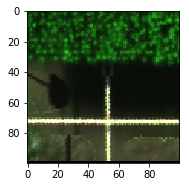

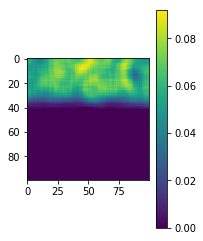

In [63]:
fig =  plt.figure()
plt.subplot(121)
plt.imshow(imagen)
plt.show()
plt.subplot(122)
plt.imshow(densidad.T)
plt.colorbar();
plt.show()


# Integracion mapa de densidad

In [59]:
unique, counts = np.unique(densidad, return_counts=True)
print(np.sum(unique* counts),cuenta)

87.752998040698 86


# Revision valores nodata

In [60]:
contador= 0
nodata = []
for element in hf["images"]:
    unique, counts = np.unique(element, return_counts=True)
#     valores=dict(zip(unique, counts))
    if(65535 in unique):
        nodata.append(contador)
    contador +=1

KeyboardInterrupt: 

In [ ]:
len(nodata)

In [ ]:
plt.imshow(hf["images"][nodata[0]])
plt.show()

In [ ]:
fig=plt.figure()
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    print(i)
    img = plt.imshow(hf["images"][nodata[i]])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()